# Assignment 2: Network and semantic analysis of rappers in the USA

In this assignment we use network theory and NLP to analyze rappers split over the west and east coast of the USA. For the analysis, we use the content of the rappers' wikipedia pages and the links between them.

The set of rappers is determined by the two category pages for west coast and east coast hip hop artists on wikipedia: 

- https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians
- https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians

The first step of the assignemt is the gathering of data and the building of the network.

## Part 0: Building the network

First step of building the network is fetching the names of the rappers in the two categories. For this, we have decided to fetch the names from the category pages on wikipedia themselves. This strategy has the advantages of being: 

- *Dynamic and up-to-date*: As the content of the wikipedia pages regularily gets updated. 
- *Clean*: As the names from the wikipedia pages are retrieved directly from the html, we can be sure that the names do not need cleaning to be used later in the retrieval of wikipedia pages through the wikipedia API.

The method for retrieving the names from the category pages is done by fetching the html code for the category pages, using a regular expression to find the links that are not 1. anchor links or 2. special links and then saving the hyperlinks as the names of the rappers.

The regular expression used to find the links is the following: 

<div style="text-align: center">

`href="/wiki/([^:#"]+)"`

</div>

It is constructed as follows:

- `href="/wiki/`: The literal part of the regular expression is used to match links pointing to Wikipedia pages.
- `(`and `)`: The capturing paranthese are used to capture the part of the url after `/wiki/`.
- `[^:#"]+`: The main capturing pattern is used to match the page name but avoids URLs with colons, hashes, or double quotes. This ensures it doesn't capture anchor links or special Wikipedia namespace links.
- `"`: The `"` is used to match the end of the link.

The regular expression is used to find the hyperlink reference of the rappers. For both the east and west coast category pages, the first respectively 17 and 15 links are not rappers, and are hence removed from the list before storing. 

The code for fetching the names of the rappers is shown in the Appendix. 


## Part 1: Network visualization and basic stats

In [ ]:
import networkx as nx
import os
import re

# Get the list of rapper names from rapperEast.txt
eastNames = []
with open('/Users/roidalsgard/Documents/GitHub/socialgraphs2023/rapperEast.txt', 'r') as f:
    for line in f:
        eastNames.append(line.strip())

# Get the list of rapper names from rapperWest.txt
westNames = []
with open('/Users/roidalsgard/Documents/GitHub/socialgraphs2023/rapperWest.txt', 'r') as f:
    for line in f:
        westNames.append(line.strip())

#Create a graph
G = nx.Graph()

G.add_node(eastNames[0])

for name in eastNames:
    text = open('htmlEast/' + name + '.txt', 'r')
    text = text.read()
    G.add_node(name, attr_coast = 'east', attr_length = len(text), color='red')
    wikiLinks = re.findall('href="/wiki/([^:#"]+)"', text)
    for link in wikiLinks:
        #skip if the link is to itself
        if link == name:
            continue
        if link in eastNames:
            G.add_edge(name, link)
        if link in westNames:
            G.add_edge(name, link)

for name in westNames:
    text = open('htmlWest/' + name + '.txt', 'r')
    text = text.read()
    G.add_node(name, attr_coast = 'west', attr_length = len(text), color='green')
    wikiLinks = re.findall('href="/wiki/([^:#"]+)"', text)
    for link in wikiLinks:
        #skip if the link is to itself
        if link == name:
            continue
        if link in eastNames:
            G.add_edge(name, link)
        if link in westNames:
            G.add_edge(name, link)

#Print all notes including their attributes
for n in G.nodes(data=True):
    print(n)

#Print all edges
for e in G.edges():
    print(e)

print(len(eastNames))
print(len(westNames))
print(len(nx.nodes(G)))
print(len(nx.edges(G)))

## Part 2: Word-clouds

## Part 3: Communities

## Part 4: Sentiment of communities

In [12]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import PlaintextCorpusReader, stopwords
import os
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

save_path_east = 'wikisEast'
save_path_west = 'wikisWest'

raw_east = []
raw_west = []

# Retrieve all .txt files in /jsons folder and append them to raw_east
for file in os.listdir(save_path_east):
    if file.endswith(".txt"):
        with open(os.path.join(save_path_east, file), 'r') as f:
            # Extract the name of the text without the filepath and .txt
            fname = os.path.splitext(os.path.basename(f.name))[0]
            fdict = {
                "name": fname,
                "text": f.read()
            }
            raw_east.append(fdict)

            


for file in os.listdir(save_path_west):
    if file.endswith(".txt"):
        with open(os.path.join(save_path_west, file), 'r') as f:
            fname = os.path.splitext(os.path.basename(f.name))[0]
            fdict = {
                "name": fname,
                "text": f.read()
            }
            raw_west.append(fdict)

# Tokenize the pages into individual strings

for dict in raw_east:
    dict["tokens"] = nltk.word_tokenize(dict["text"])

for dict in raw_west:
    dict["tokens"] = nltk.word_tokenize(dict["text"])


# Remove all punctuation from your list of tokens

stopwords = set(stopwords.words('english'))

for dict in raw_east:
    dict["tokens"] = [word for word in dict["tokens"] if word.isalpha()]
    dict["tokens"] = [word.lower() for word in dict["tokens"]]
    dict["tokens"] = [lemmatizer.lemmatize(word) for word in dict["tokens"]]
    dict["tokens"] = [word for word in dict["tokens"] if not word in stopwords]

for dict in raw_west:
    dict["tokens"] = [word for word in dict["tokens"] if word.isalpha()]
    dict["tokens"] = [word.lower() for word in dict["tokens"]]
    dict["tokens"] = [lemmatizer.lemmatize(word) for word in dict["tokens"]]
    dict["tokens"] = [word for word in dict["tokens"] if not word in stopwords]

#east_tokens = [word for word in east_tokens if word.isalpha()]
#west_tokens = [word for word in west_tokens if word.isalpha()]

# Set everything to lower case
#east_tokens = [word.lower() for word in east_tokens]
#west_tokens = [word.lower() for word in west_tokens]

# Lemmatze
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()

#east_tokens = [lemmatizer.lemmatize(word) for word in east_tokens]
#west_tokens = [lemmatizer.lemmatize(word) for word in west_tokens]



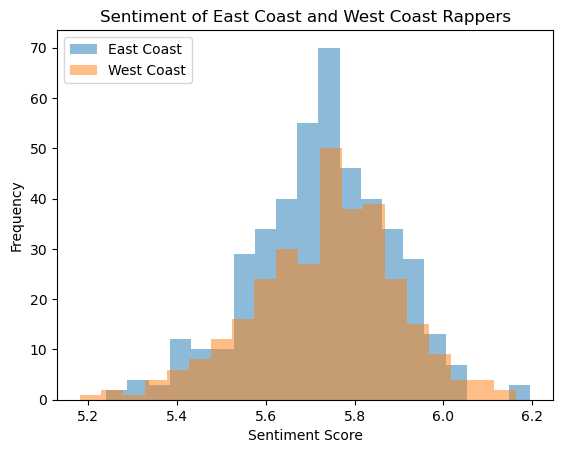

10 lowest sentiment scores
Shaquille_O%27Neal None
Knero_Lapa%C3%A9 None
Cam%27ron None
GFMBryyce None
Ol%27_Dirty_Bastard None
DJ_E-Z_Rock None
Lil%27_Kim None
Lil%27_Cease None
Red_Caf%C3%A9 None
Mr._Muthafuckin%27_eXquire None
10 highest sentiment scores
Foreknown_(rapper) 6.024999999999999
V._Rose 6.051867704280154
Sky_Blu_(rapper) 6.0596143958868955
KC_Montero 6.061728395061728
Roshon_Fegan 6.073565217391299
Dave_Free 6.096595744680857
MC_Yogi 6.106153846153848
D_Smoke 6.114497041420122
Fantasy_A 6.154786729857821
Emcee_N.I.C.E. 6.164415584415578


In [13]:
import pandas as pd

# Check if it has been correctly tokenized by printing the 20 most common tokens in the first dictionary of raw_east

def parse_labMT(file_content):
    lines = file_content.split('\n')
    labMT_dict = {}
    for line in lines[4:]:  # Skip the first two lines (header)
        parts = line.split('\t')
        if len(parts) > 2:  # Ensure there's a word and a happiness score
            word = parts[0]
            happiness_score = float(parts[2])
            labMT_dict[word] = happiness_score
    return labMT_dict

labMT_dict = parse_labMT(open('Data_Set_S1.txt').read())

# Compute the sentiment score for each rapper
def compute_sentiment(rapper_dict, labMT_dict):
    total_score = 0
    count = 0
    for token in rapper_dict['tokens']:
        if token in labMT_dict:
            total_score += labMT_dict[token]
            count += 1
    # Compute the average sentiment score
    if count != 0:
        return total_score / count
    else:
        return None  # Or some default value if there are no matches

for rapper in raw_east:
    rapper['sentiment_score'] = compute_sentiment(rapper, labMT_dict)

for rapper in raw_west:
    rapper['sentiment_score'] = compute_sentiment(rapper, labMT_dict)

# Print the 10 dictionaries with the highest and lowest sentiment score 

# Sort the list of dictionaries by sentiment score
sorted_east = sorted(raw_east, key=lambda k: k['sentiment_score']if k['sentiment_score'] is not None else float('-inf'))
sorted_west = sorted(raw_west, key=lambda k: k['sentiment_score']if k['sentiment_score'] is not None else float('-inf'))

# Print the 10 dictionaries with the highest and lowest sentiment score
# print('East Coast')
# print('10 lowest sentiment scores')
# for rapper in sorted_east[:10]:
#     print(rapper['name'], rapper['sentiment_score'])
# print('10 highest sentiment scores')
# for rapper in sorted_east[-10:]:
#     print(rapper['name'], rapper['sentiment_score'])

# print('West Coast')
# print('10 lowest sentiment scores')
# for rapper in sorted_west[:10]:
#     print(rapper['name'], rapper['sentiment_score'])
# print('10 highest sentiment scores')
# for rapper in sorted_west[-10:]:
#     print(rapper['name'], rapper['sentiment_score'])

# Plot the sentiment for each coast as a histogram

import matplotlib.pyplot as plt

# Create a list of sentiment scores for each coast
east_sentiment = [rapper['sentiment_score'] for rapper in raw_east if rapper['sentiment_score'] is not None]
west_sentiment = [rapper['sentiment_score'] for rapper in raw_west if rapper['sentiment_score'] is not None]

# Plot the histograms
plt.hist(east_sentiment, bins=20, alpha=0.5, label='East Coast')
plt.hist(west_sentiment, bins=20, alpha=0.5, label='West Coast')
plt.legend(loc='upper left')
plt.title('Sentiment of East Coast and West Coast Rappers')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Who are the top 10 most positive and negative rappers in overall

# Sort the list of dictionaries by sentiment score
sorted_east = sorted(raw_east, key=lambda k: k['sentiment_score']if k['sentiment_score'] is not None else float('-inf'))
sorted_west = sorted(raw_west, key=lambda k: k['sentiment_score']if k['sentiment_score'] is not None else float('-inf'))

sorted = sorted_east + sorted_west

# Print the 10 dictionaries with the highest and lowest sentiment score
print('10 lowest sentiment scores')
for rapper in sorted[:10]:
    print(rapper['name'], rapper['sentiment_score'])
print('10 highest sentiment scores')
for rapper in sorted[-10:]:
    print(rapper['name'], rapper['sentiment_score'])   






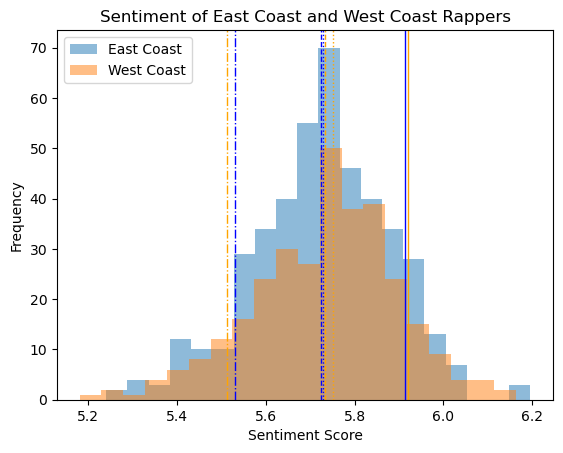

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate statistics for East Coast
east_mean = np.mean(east_sentiment)
east_median = np.median(east_sentiment)
east_10th = np.percentile(east_sentiment, 10)
east_90th = np.percentile(east_sentiment, 90)

# Calculate statistics for West Coast
west_mean = np.mean(west_sentiment)
west_median = np.median(west_sentiment)
west_10th = np.percentile(west_sentiment, 10)
west_90th = np.percentile(west_sentiment, 90)

# Plot histograms and annotate with statistics
plt.hist(east_sentiment, bins=20, alpha=0.5, label='East Coast')
plt.axvline(east_mean, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(east_median, color='blue', linestyle='dotted', linewidth=1)
plt.axvline(east_10th, color='blue', linestyle='dashdot', linewidth=1)
plt.axvline(east_90th, color='blue', linestyle='solid', linewidth=1)

plt.hist(west_sentiment, bins=20, alpha=0.5, label='West Coast')
plt.axvline(west_mean, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(west_median, color='orange', linestyle='dotted', linewidth=1)
plt.axvline(west_10th, color='orange', linestyle='dashdot', linewidth=1)
plt.axvline(west_90th, color='orange', linestyle='solid', linewidth=1)

plt.legend(loc='upper left')
plt.title('Sentiment of East Coast and West Coast Rappers')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [17]:
def label_shuffling(sentiments, actual_group_size, num_iterations=1000):
    observed_mean = np.mean(sentiments[:actual_group_size])
    shuffled_means = []

    for _ in range(num_iterations):
        np.random.shuffle(sentiments)
        shuffled_mean = np.mean(sentiments[:actual_group_size])
        shuffled_means.append(shuffled_mean)

    return observed_mean, shuffled_means

# Combine sentiments from both coasts for shuffling
combined_sentiments = east_sentiment + west_sentiment

observed_mean, shuffled_means = label_shuffling(combined_sentiments, len(west_sentiment))

# Determine how many shuffled means are less than the observed mean
count_less_than_observed = sum(1 for mean in shuffled_means if mean < observed_mean)

# Determine how many shuffled means are greater than the observed mean
count_greater_than_observed = sum(1 for mean in shuffled_means if mean > observed_mean)

# Print results
print(f"Number of times shuffled mean < observed mean: {count_less_than_observed}")
print(f"Number of times shuffled mean > observed mean: {count_greater_than_observed}")


Number of times shuffled mean < observed mean: 248
Number of times shuffled mean > observed mean: 752


# Appendix

In [19]:
import urllib.request
import re
import networkx as nx
import pandas as pd
import os
import json
import networkx as nx

# Fetch the names from the current wikipedia category pages for West Coast and East Cost Hip Hop Musicians
def fetch_current_names():
    urlWest = 'https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians'
    response = urllib.request.urlopen(urlWest)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    westNames = re.findall('href="/wiki/([^:#"]+)"', textWest)
    urlWest = 'https://en.wikipedia.org/w/index.php?title=Category:West_Coast_hip_hop_musicians&pagefrom=McFedries%2C+Trevor%0ATrevor+McFedries#mw-pages'
    response = urllib.request.urlopen(urlWest)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    westNames2 = re.findall('href="/wiki/([^:#"]+)"', textWest)
    westNames = westNames[17:] + westNames2[17:]


    urlEast = 'https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians'
    response = urllib.request.urlopen(urlEast)
    data = response.read()      # a `bytes` object
    textEast = data.decode('utf-8')
    eastNames = re.findall('href="/wiki/([^:#"]+)"', textEast)
    urlEast = 'https://en.wikipedia.org/w/index.php?title=Category:East_Coast_hip_hop_musicians&pagefrom=Junglepussy%0AJunglepussy#mw-pages'
    response = urllib.request.urlopen(urlEast)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    eastNames2 = re.findall('href="/wiki/([^:#"]+)"', textWest)
    urlEast = 'https://en.wikipedia.org/w/index.php?title=Category:East_Coast_hip_hop_musicians&pagefrom=Stezo#mw-pages'
    response = urllib.request.urlopen(urlEast)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    eastNames3 = re.findall('href="/wiki/([^:#"]+)"', textWest)
    eastNames = eastNames[15:] + eastNames2[15:] + eastNames3[15:]
    
    names = eastNames + westNames
    
    # Save the combined list of both east and west in a .txt file called "rappers"
    with open('rappers.txt', 'w') as f:
        for item in westNames:
            f.write("%s\n" % item)
        for item in eastNames:
            f.write("%s\n" % item)

    # Save the list of east in a .txt file called "rappersEast"
    with open('rappersEast.txt', 'w') as f:
        for item in eastNames:
            f.write("%s\n" % item)

    # Save the list of west in a .txt file called "rappersWest"
    with open('rappersWest.txt', 'w') as f:
        for item in westNames:
            f.write("%s\n" % item)

    return names, eastNames, westNames

def fetch_wiki_html(rappers, coast):

    if coast == "east":
        directory = 'htmlEast'
    elif coast == "west":
        directory = 'htmlWest'
    else:
        raise ValueError("Invalid coast value. Use either 'east' or 'west'.")


    for rapper in rappers:
        url = 'https://en.wikipedia.org/wiki/' + rapper
        response = urllib.request.urlopen(url)
        data = response.read()      # a `bytes` object
        text = data.decode('utf-8')
        with open(f'{directory}/{rapper}.txt', 'w', encoding="utf-8") as f:
            f.write(text)

def fetch_wiki_texts(rappers, coast):
    # Base URL for the Wikipedia API
    base_url = 'https://en.wikipedia.org/w/api.php'
    
    # Determine the directory based on the coast
    if coast == "east":
        directory = 'textsEast'
    elif coast == "west":
        directory = 'textsWest'
    else:
        raise ValueError("Invalid coast value. Use either 'east' or 'west'.")

    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Loop through the rapper names
    for rapper in rappers:
        # Prepare parameters for the API request
        params = {
            "action": "query",
            "prop": "extracts",
            "exlimit": "1",
            "explaintext": "1",
            "format": "json",
            "titles": rapper
        }

        # Construct the full URL
        api_url = base_url + "?" + urllib.parse.urlencode(params)
        
        # Make the request
        response = urllib.request.urlopen(api_url)
        data = json.loads(response.read().decode('utf-8'))
        
        # Parse the JSON data to get the 'extract' key
        pages = data.get("query", {}).get("pages", {})
        for page_id, page_data in pages.items():
            content = page_data.get("extract", "")
            # Save the content to the appropriate .txt file in the designated directory
            with open(f'{directory}/{rapper}.txt', 'w', encoding="utf-8") as f:
                f.write(content)
            if (content == ""):
                print(f"Could not find content for {rapper}")

### Outcomment this to get the current data ###
names, eastNames, westNames = fetch_current_names()
fetch_wiki_html(eastNames, "east")
fetch_wiki_html(westNames, "west")
fetch_wiki_texts(eastNames, "east")
fetch_wiki_texts(westNames, "west")


Could not find content for Cam%27ron
Could not find content for Lil%27_Cease
Could not find content for DJ_E-Z_Rock
Could not find content for GFMBryyce
Could not find content for Knero_Lapa%C3%A9
Could not find content for Lil%27_Kim
Could not find content for Mr._Muthafuckin%27_eXquire
Could not find content for Ol%27_Dirty_Bastard
Could not find content for Shaquille_O%27Neal
Could not find content for Red_Caf%C3%A9
Could not find content for Ak%27Sent
Could not find content for Amin%C3%A9_(rapper)
Could not find content for Bavgate
Could not find content for Beeda_Weeda
Could not find content for Captain_Save_%27Em
Could not find content for DB_Tha_General
Could not find content for Den_Fenn
Could not find content for Dolla_Will
Could not find content for Dubb_20
Could not find content for Duna_(rapper)
Could not find content for G-Nut
Could not find content for G-Stack
Could not find content for Haiku_d%27Etat
Could not find content for K-the-I%3F%3F%3F
Could not find content for 

In [20]:
# Count the number of files in wikisEast and wikisWest combined
import os
count1 = 0
count2 = 0
for file in os.listdir("wikisEast"):
    count1 += 1
for file in os.listdir("wikisWest"):
    count2 += 1

print(count1)
print(count2)
print(count1 + count2)

# Count the number of files in htmlEast and htmlWest 

count1 = 0
count2 = 0
for file in os.listdir("htmlEast"):
    count1 += 1
for file in os.listdir("htmlWest"):
    count2 += 1

print(count1)
print(count2)
print(count1 + count2)

# Count the number of lines in rappersEast.txt and rappersWest.txt

count1 = 0
count2 = 0

with open("rappersEast.txt", "r") as f:
    for line in f:
        count1 += 1
with open("rappersWest.txt", "r") as f:
    for line in f:
        count2 += 1

print(count1)
print(count2)
print(count1 + count2)

# Compare the filenames in wikisEast and wikisWest to the names in rappersEast.txt and rappersWest.txt and print the names that are not in any of the folders

import os
import re

# Get the names of the files in wikisEast and wikisWest
wikisEast = []
wikisWest = []
for file in os.listdir("wikisEast"):
    # Remove the .txt extension from the file name
    file = re.sub(".txt", "", file)
    wikisEast.append(file)
for file in os.listdir("wikisWest"):
    # Remove the .txt extension from the file name
    file = re.sub(".txt", "", file)
    wikisWest.append(file)

# Get the names of the rappers in rappersEast.txt and rappersWest.txt
rappersEast = []
rappersWest = []
with open("rappersEast.txt", "r") as f:
    for line in f:
        rappersEast.append(line.strip())
with open("rappersWest.txt", "r") as f:
    for line in f:
        rappersWest.append(line.strip())

# Compare the names of the files in wikisEast and wikisWest to the names in rappersEast.txt and rappersWest.txt
# Print the names that are not in any of the folders
for rapper in rappersEast:
    if rapper not in wikisEast:
        print(rapper)
for rapper in rappersWest:
    if rapper not in wikisWest:
        print(rapper)



450
354
804
450
354
804
450
354
804
